In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

np.random.seed(21032001)

def softmax(Z):
  """
  Compute softmax values for each sets of scores in V.
  each column of V is a set of score.
  """
  e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims=True))
  A = e_Z / e_Z.sum(axis = 0)
  return A

# One_hot coding
def convert_labels(y, C):
  """
  convert 1d label to matrix label: each column of this
  matrix corresponding to 1 element in y. In i-th column of y,
  only one non-zeros element located in y[i]-th position,
  and = 1. Ex: y = [0, 2, 1, 0], and 3 classes then return  

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]

  """
  Y = sparse.coo_matrix((np.ones_like(y), 
                         (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
  return Y

# Cost function
def cost(X, Y, W):
  A = softmax(np.dot(W.T, X))
  return -np.sum(Y*np.log(A))

W_init = np.random.rand(d, C)

def grad(X, Y, W):
  A = softmax(np.dot(W.T, X))
  E = A - Y
  return np.dot(X, E.T)

def check_gradient(g1, g2):
  return np.linalg.norm(g1 - g2) < 1e-6

def softmax_Regression(X, y, W_init, eta, tol, max_count):
  W = [W_init]
  C = W_init.shape[1]
  Y = convert_labels(y, C)
  it = 0
  N = X.shape[1]
  d = X.shape[0]
  count = 0
  check_w_after = 20
  while count < max_count:
    # Mix data
    mix_id = np.random.permutation(N)
    for i in mix_id:
      xi = X[:, i].reshape(d, 1)
      yi = Y[:, i].reshape(C, 1)
      ai = softmax(np.dot(W[-1].T, xi))
      W_new = W[-1] + eta*np.dot(xi, (yi - ai).T)
      count += 1
      # Stopping criteria
      if count % check_w_after == 0:
        if np.linalg.norm(W_new - W[-check_w_after]) < tol:
          return W, count
      W.append(W_new)
  return W, count

def pred(W, X):
  """
  predict output of each columns of X
  Class of each x_i is determined by location of max probability
  Note that class are indexed by [0, 1, 2, ...., C-1]
  """
  A = softmax(np.dot(W.T, X))
  return np.argmax(A, axis=0)

[0 0 0 ... 2 2 2]


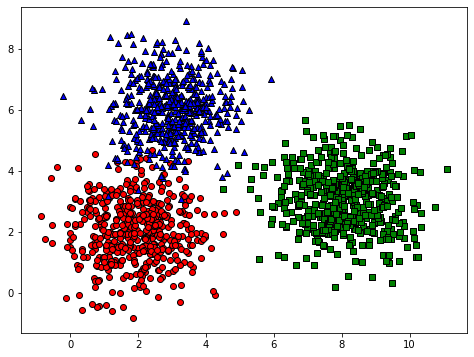

In [11]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# Each column is a datapoint
X = np.concatenate((X0, X1, X2), axis = 0).T
# Extended data
X = np.concatenate((np.ones((1, 3*N)), X), axis=0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(original_label)

plt.figure(1, figsize=(8, 6))

plt.scatter(X0[:, 0], X0[:, 1], c='r', marker='o', edgecolors='k')
plt.scatter(X1[:, 0], X1[:, 1], c='g', marker='s', edgecolors='k')
plt.scatter(X2[:, 0], X2[:, 1], c='b', marker='^', edgecolors='k')

plt.show()

In [12]:
W_init = np.random.randn(X.shape[0], C)
W, count = softmax_Regression(X, original_label, W_init, .05, 1e-4, 10000)
print(W[-1])
print(count)

[[ 7.53605075 -4.9449365  -4.49501325]
 [-0.63638243  1.86172659 -0.59422157]
 [ 0.04201094  0.1103684   2.78306533]]
10500


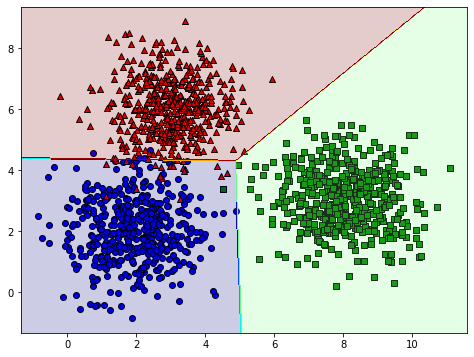

In [13]:
# Visualize
x_min, x_max = X[1, :].min() - .5, X[1, :].max() + .5
y_min, y_max = X[2, :].min() - .5, X[2, :].max() + .5
h = .025

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis=0)

Z = pred(W[-1], XX)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 6))

plt.scatter(X0[:, 0], X0[:, 1], c='b', marker='o', edgecolors='k')
plt.scatter(X1[:, 0], X1[:, 1], c='g', marker='s', edgecolors='k')
plt.scatter(X2[:, 0], X2[:, 1], c='r', marker='^', edgecolors='k')

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .2)

plt.show()